In [ ]:
import torch
import torch.nn as nn
import torchvision.models as model, torchvision
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
from tempfile import TemporaryDirectory

In [ ]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = torchvision.datasets.Flowers102(root='./data', split='train',download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

dataset_sizes = [train_dataset]

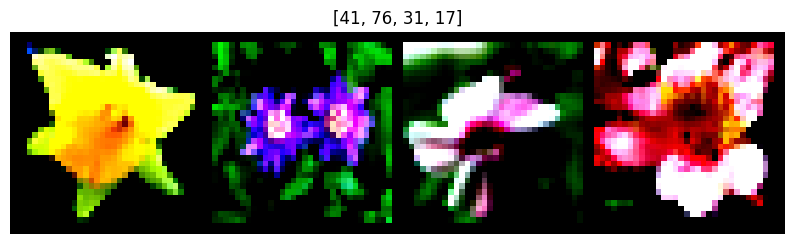

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs[:4])

# Plot the images
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(out, (1, 2, 0)))
plt.title(classes[:4].tolist())
plt.axis('off')
plt.show()


In [ ]:
for data,labels in train_loader:
  break

In [ ]:
data[0]

tensor([[[-1.2959, -1.1760, -1.1418,  ..., -1.4158, -1.3815, -1.3473],
         [-1.3987, -1.3302, -1.1418,  ..., -1.3815, -1.3644, -1.3644],
         [-1.2788, -1.4500, -1.2445,  ..., -1.2617, -1.2959, -1.3473],
         ...,
         [-1.5185, -1.3815, -1.2445,  ..., -1.0904, -0.9192, -0.0116],
         [-1.2788, -1.2617, -1.1589,  ..., -0.7993, -0.2856,  0.2624],
         [-1.1932, -1.1589, -1.1932,  ..., -0.1828, -0.2856,  0.7591]],

        [[-0.6352, -0.3550, -0.2850,  ..., -1.3354, -1.2304, -1.1954],
         [-0.7577, -0.5476, -0.2500,  ..., -1.1954, -1.1954, -1.1954],
         [-0.4251, -0.6527, -0.4076,  ..., -1.1078, -1.1253, -1.1954],
         ...,
         [-1.3354, -1.2129, -1.0903,  ..., -1.0378, -0.9153, -0.1275],
         [-0.6001, -0.5651, -0.5651,  ..., -0.8627, -0.4601,  0.0301],
         [-0.3725, -0.3025, -0.3025,  ..., -0.3375, -0.4601,  0.4503]],

        [[-1.5430, -1.3513, -1.2641,  ..., -1.0550, -0.9678, -0.9678],
         [-1.4733, -1.4036, -1.1770,  ..., -0

In [ ]:
labels

tensor([ 26,  67,  42,  65,  45,  66,  22,  62,  19,  56,  23,  89,  43,  19,
         65,  35,  61,  34,  13,  66,  46,  41,  57,  57,  66,  50,  38,  66,
         80,  73,   9,  85,  46,  58,  56,  85,  66,  42,  40,  27,  14,  13,
         43,  93,  34,  50,  71,  74,  29,  90,   1,   8,  75,   0,  43,   8,
         98,  42,  26,  39,  91,  52, 100,  92])

#Model

In [ ]:
class classify(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,16,3)
    self.conv2 = nn.Conv2d(16,26,4)
    self.l1 = nn.Linear(26*6*6,500)
    self.l2 = nn.Linear(500,350)
    self.l3 = nn.Linear(350,200)
    self.l4 = nn.Linear(200,102)
    # self.softmax = (dim=1)


  def forward(self,x):
    # print(x.shape)
    x = F.relu(self.conv1(x))
    # print(x.shape)
    x = F.max_pool2d(x,(2,2))
    # print(x.shape)
    x = F.relu(self.conv2(x))
    # print(x.shape)
    x = F.max_pool2d(x,(2,2))
    # print(x.shape)
    x = x.view(-1, 26*6*6)
    # print(x.shape)
    x = F.relu(self.l1(x))
    x = F.relu(self.l2(x))
    x = F.relu(self.l3(x))
    x = F.relu(self.l4(x))
    x = F.softmax(x,dim=1)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

network = classify()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        network.train()
        inputs, labels = data

        optimizer.zero_grad()

        # print(inputs,labels)
        outputs = network(inputs)
        # print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('[%d] loss: %.3f' % (epoch + 1,  running_loss / 2000))
    running_loss = 0.0

[1] loss: 0.148
[2] loss: 0.148
[3] loss: 0.148
[4] loss: 0.148
[5] loss: 0.148
[6] loss: 0.148
[7] loss: 0.148
[8] loss: 0.148
[9] loss: 0.148
[10] loss: 0.148
